 Importing Libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df = pd.read_csv('/content/sentiment.csv')

In [ ]:
df.head()

,Column1,Date,User,Tweet
0,0.0,08-04-2023 09:03,kirbydjohnson,#ChatGPT If only there were a movie or somethi...
1,1.0,08-04-2023 09:02,UniversityWeb,"Workshop Description: In this workshop, you wi..."
2,2.0,08-04-2023 09:02,AiNewsDrop,New Post at AiNewsDrop!\n\nChatGPT is a doctor...
3,3.0,08-04-2023 09:01,tubeblogger,OpenAI’s GPT-4 Just Got Supercharged! #ai #Cha...
4,4.0,08-04-2023 09:00,majorradic,"""Classical art"" is struggling - not changed th..."


In [ ]:
df.tail()

,Column1,Date,User,Tweet
478374,478261.0,01-12-2022 00:03,david_teather,@OpenAI 's new #ChatGPT is insane\nPrompt: An ...
478375,478262.0,01-12-2022 00:01,StuJLans,ChatGPT first look - https://t.co/16K2NlmOoY. ...
478376,478263.0,30-11-2022 23:56,GuyP,OK so @OpenAI's new #ChatGPT can basically jus...
478377,478264.0,30-11-2022 23:52,mssawan,Just in! \n#ChatGPT - research early stage GPT...
478378,478265.0,30-11-2022 23:43,ttuccoo,#ai Models are set to become the search engine...


In [ ]:
df.shape

(478379, 4)

In [ ]:
df.columns

Index(['Column1', 'Date', 'User', 'Tweet'], dtype='object')

In [ ]:
df.isnull().sum()

Column1    113
Date       113
User       113
Tweet       84
dtype: int64

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478379 entries, 0 to 478378
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Column1  478266 non-null  float64
 1   Date     478266 non-null  object 
 2   User     478266 non-null  object 
 3   Tweet    478295 non-null  object 
dtypes: float64(1), object(3)
memory usage: 14.6+ MB


In [ ]:
df.describe()


,Column1
count,478266.00000
mean,239132.50000
std,138063.64626
min,0.00000
25%,119566.25000
50%,239132.50000
75%,358698.75000
max,478265.00000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


In [ ]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, mask=None, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U", "Comment", "text", "attr", "object","ChatGPT","OpenAI"," ChatGPT","ChatGPT "])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,mask=mask, background_color="white").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

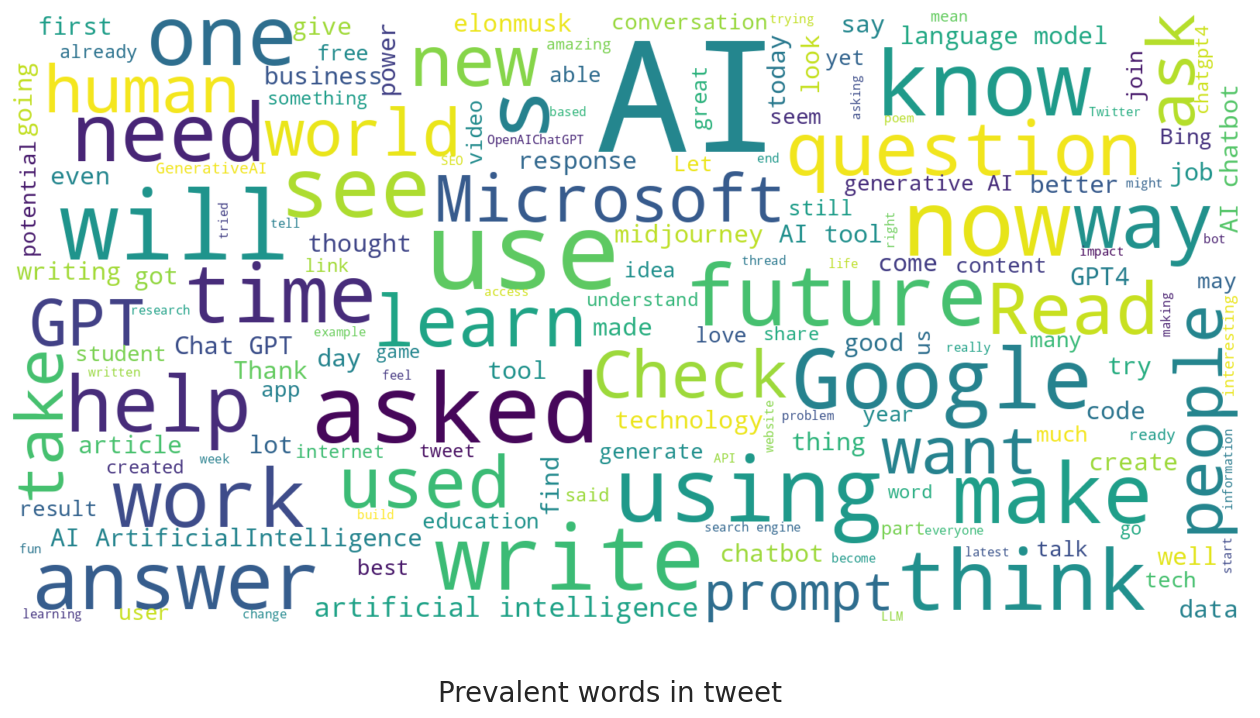

In [ ]:
show_wordcloud(df['Tweet'], title = 'Prevalent words in tweet')

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['dayofweek'] = df['Date'].dt.dayofweek
df['hour'] = df['Date'].dt.hour
df['minute'] = df['Date'].dt.minute
df['dayofyear'] = df['Date'].dt.dayofyear
df['date_only'] = df['Date'].dt.date

In [ ]:
tweets_agg_df = df.groupby(["date_only"])["Tweet"].count().reset_index()
tweets_agg_df.columns = ["date_only", "count"]

In [ ]:
def plot_time_variation(df, x='date_only', y='count', hue=None, size=1, title="", is_log=False):
    sns.set(style="whitegrid")
    paper_rc = {'lines.linewidth': 3, 'lines.markersize': 20}
    sns.set_context("paper", rc = paper_rc)
    f, ax = plt.subplots(1,1, figsize=(4*size,3*size))
    g = sns.lineplot(x=x, y=y, hue=hue, data=df)
    plt.xticks(rotation=90)
    if hue:
        plt.title(f'{y} grouped by {hue} | {title}')
    else:
        plt.title(f'{y} | {title}')
    if(is_log):
        ax.set(yscale="log")
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show()

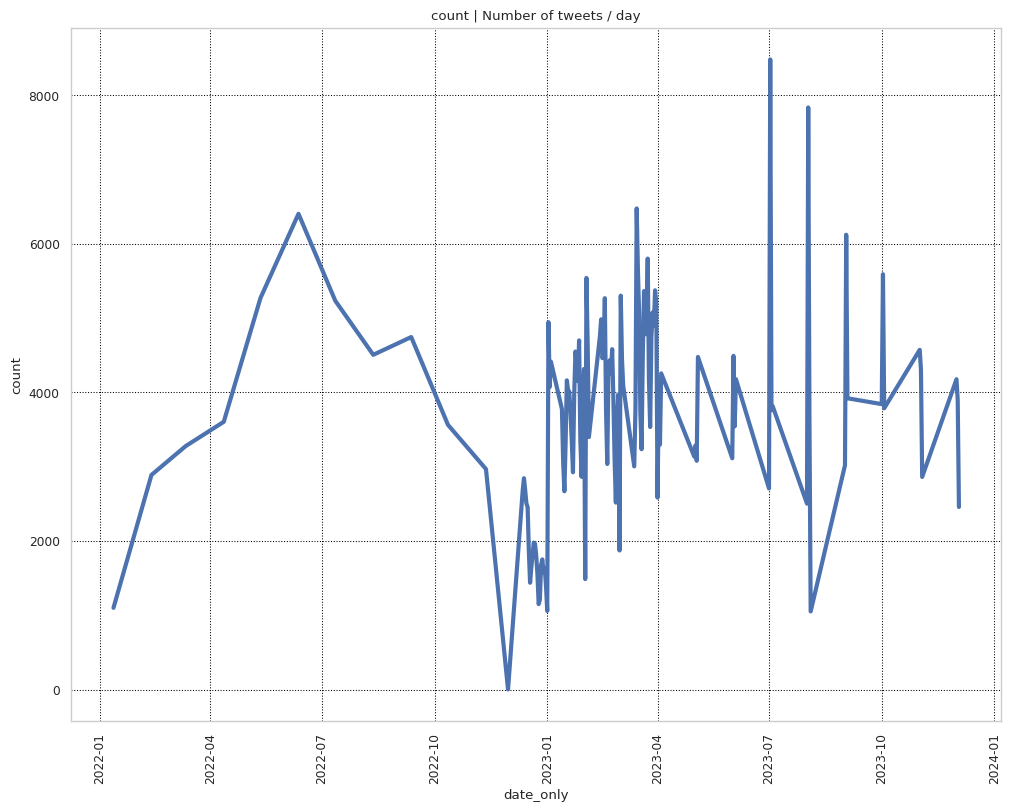

In [ ]:
plot_time_variation(tweets_agg_df, x='date_only', title="Number of tweets / day",size=3)


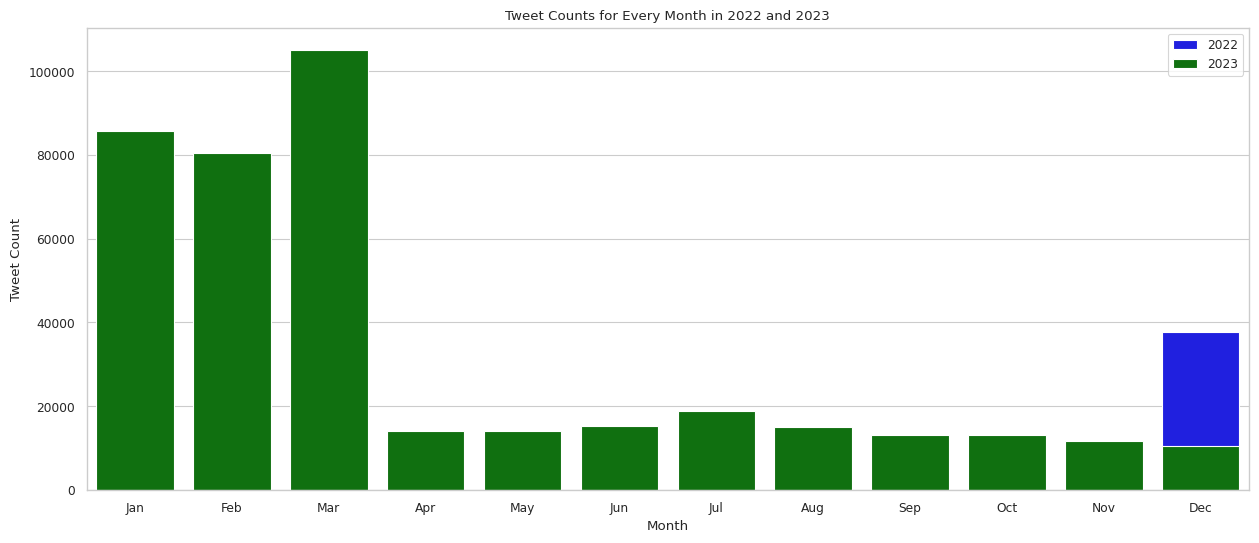

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

# Extract year and month from the 'Date' column
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month

# Filter data for the year 2022
df_2022 = df[df['year'] == 2022]

# Group by month and count the tweets for 2022
tweets_agg_2022 = df_2022.groupby(["month"])["Tweet"].count().reset_index()
tweets_agg_2022.columns = ["month", "count"]

# Filter data for the year 2023
df_2023 = df[df['year'] == 2023]

# Group by month and count the tweets for 2023
tweets_agg_2023 = df_2023.groupby(["month"])["Tweet"].count().reset_index()
tweets_agg_2023.columns = ["month", "count"]

# Plot tweet counts for every month separately for 2022 and 2023
plt.figure(figsize=(15,6))
sns.barplot(data=tweets_agg_2022, x='month', y='count', color='blue', label='2022')
sns.barplot(data=tweets_agg_2023, x='month', y='count', color='green', label='2023')
plt.xlabel('Month')
plt.ylabel('Tweet Count')
plt.title('Tweet Counts for Every Month in 2022 and 2023')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.show()

In [ ]:
df['date_only'].value_counts()

2023-07-02    8483
2023-08-02    7836
2023-03-15    6477
2022-06-12    6405
2023-09-02    6123
              ... 
2022-12-25    1151
2022-01-12    1101
2023-01-01    1059
2023-08-04    1053
2022-11-30       3
Name: date_only, Length: 130, dtype: int64

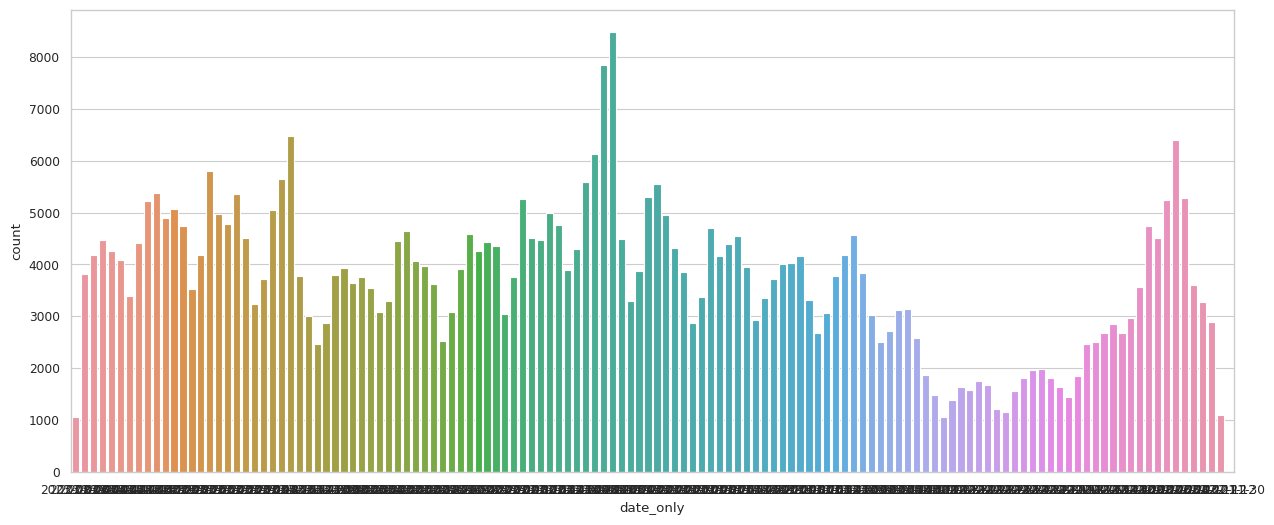

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='date_only')
plt.show()


In [ ]:
def plot_sentiment(df, feature, title):
    counts = df[feature].value_counts()
    percent = counts/sum(counts)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

    colors = ["green", "red", "blue"]
    counts.plot(kind='bar', ax=ax1, color=colors)
    percent.plot(kind='bar', ax=ax2, color=colors)
    ax1.set_ylabel(f'Counts : {title} sentiments', size=12)
    ax2.set_ylabel(f'Percentage : {title} sentiments', size=12)
    plt.suptitle(f"Sentiment analysis: {title}")
    plt.tight_layout()
    plt.show()

In [ ]:
from wordcloud import WordCloud, STOPWORDS
from sklearn.decomposition import LatentDirichletAllocation
from collections import Counter
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

In [ ]:
import nltk

# Download the vader_lexicon resource
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
 sia = SentimentIntensityAnalyzer()
def find_sentiment(post):
    try:
        if sia.polarity_scores(post)["compound"] > 0:
            return "Positive"
        elif sia.polarity_scores(post)["compound"] < 0:
            return "Negative"
        else:
            return "Neutral"
    except:
        return "Neutral"

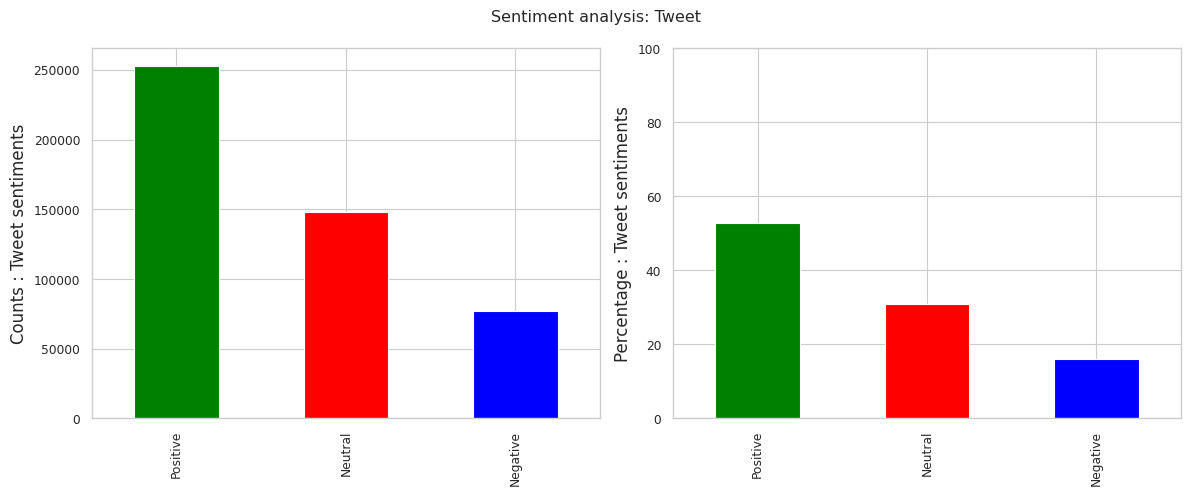

In [ ]:
import matplotlib.pyplot as plt

def plot_sentiment(df, feature, title):
    counts = df[feature].value_counts()
    percent = counts / sum(counts) * 100  # Convert to percentage

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

    colors = ["green", "red", "blue"]
    counts.plot(kind='bar', ax=ax1, color=colors)
    percent.plot(kind='bar', ax=ax2, color=colors)
    ax1.set_ylabel(f'Counts : {title} sentiments', size=12)
    ax2.set_ylabel(f'Percentage : {title} sentiments', size=12)
    ax2.set_ylim(0, 100)  # Set y-axis limit to 100 for percentage
    plt.suptitle(f"Sentiment analysis: {title}")
    plt.tight_layout()
    plt.show()

# Assuming 'text_sentiment' column contains sentiment labels ('Positive', 'Negative', 'Neutral')
df['text_sentiment'] = df['Tweet'].apply(lambda x: find_sentiment(x))
plot_sentiment(df, 'text_sentiment', 'Tweet')


In [ ]:
tweets_agg_df = df.groupby(["date_only", "text_sentiment"])["Tweet"].count().reset_index()
tweets_agg_df.columns = ["date_only", "text_sentiment", "count"]

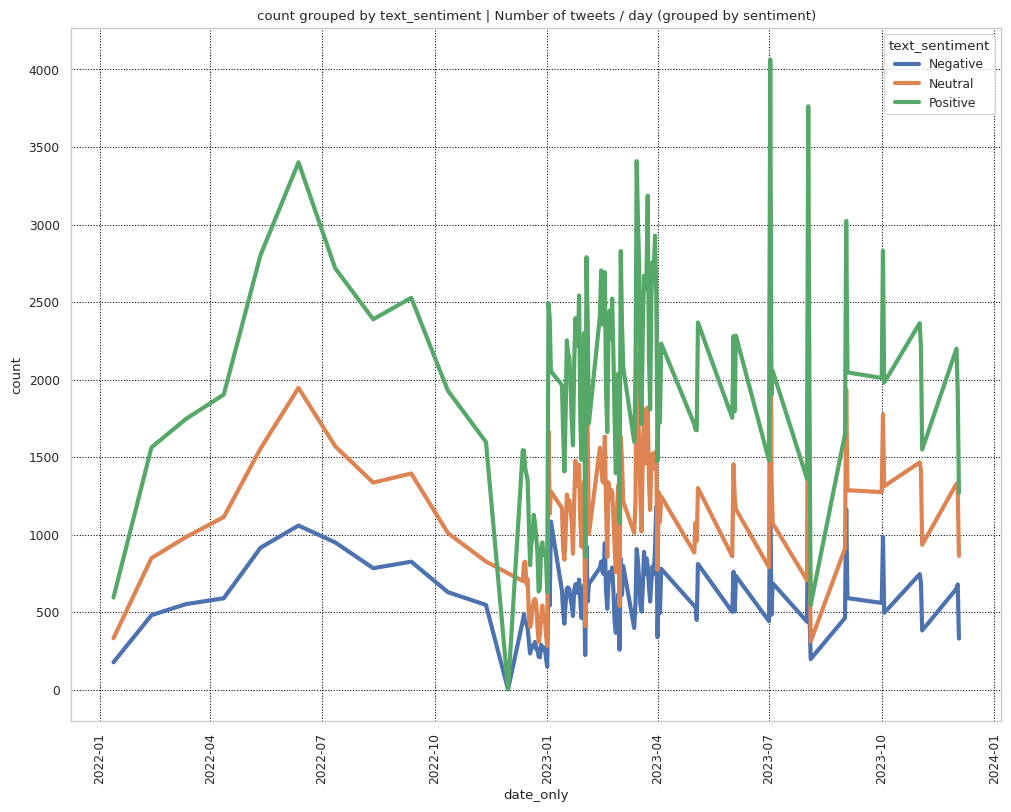

In [ ]:
plot_time_variation(tweets_agg_df, x='date_only', hue="text_sentiment", title="Number of tweets / day (grouped by sentiment)",size=3)

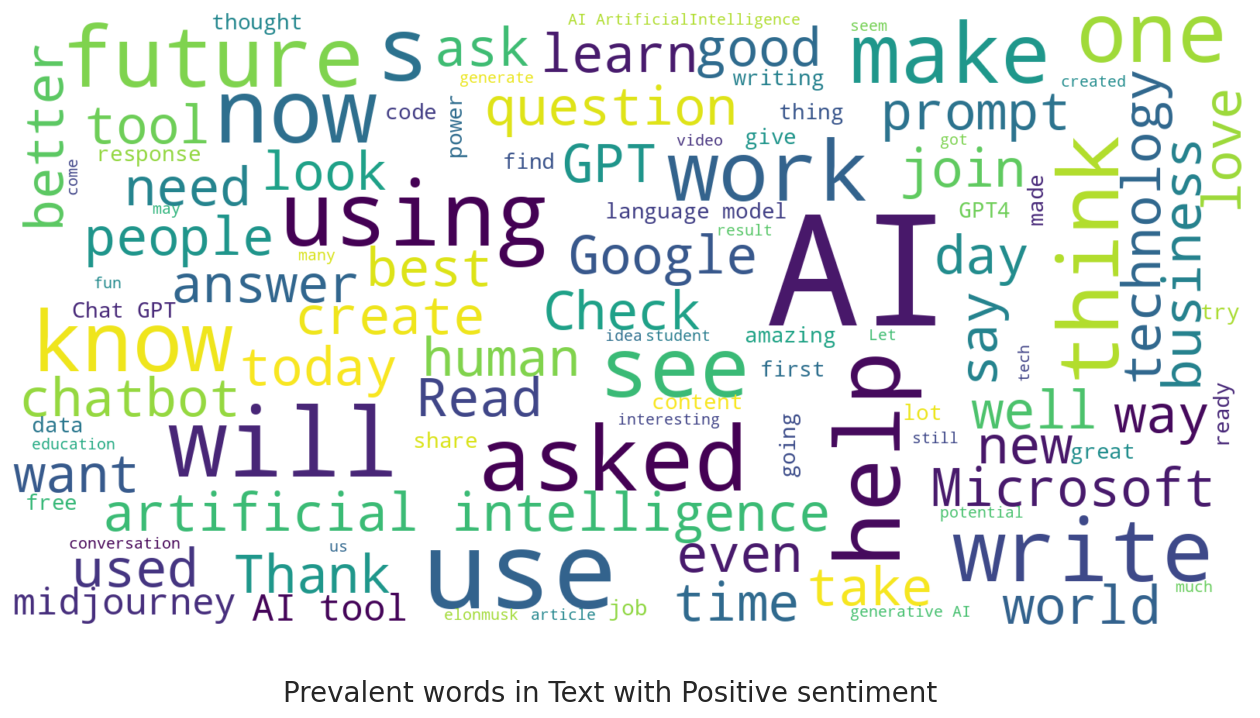

In [ ]:
show_wordcloud(df.loc[df['text_sentiment']=="Positive", 'Tweet'], title = 'Prevalent words in Text with Positive sentiment', mask=None)

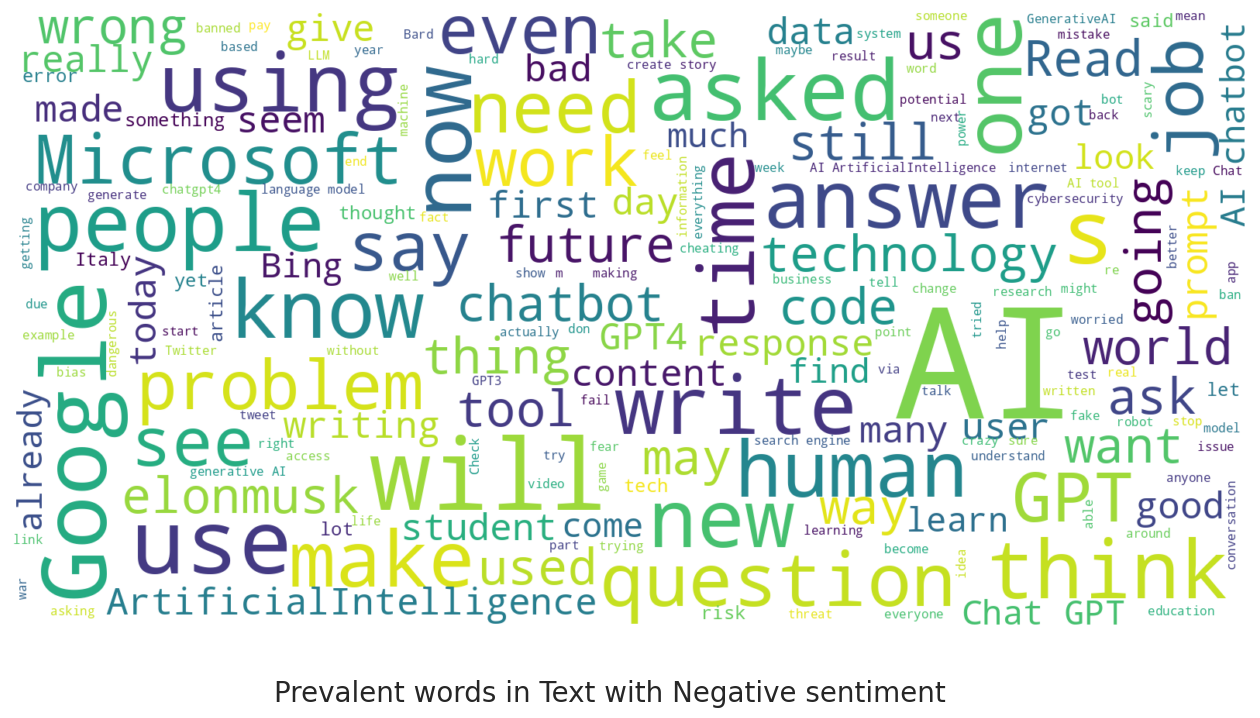

In [ ]:
show_wordcloud(df.loc[df['text_sentiment']=="Negative", 'Tweet'], title = 'Prevalent words in Text with Negative sentiment', mask=None)

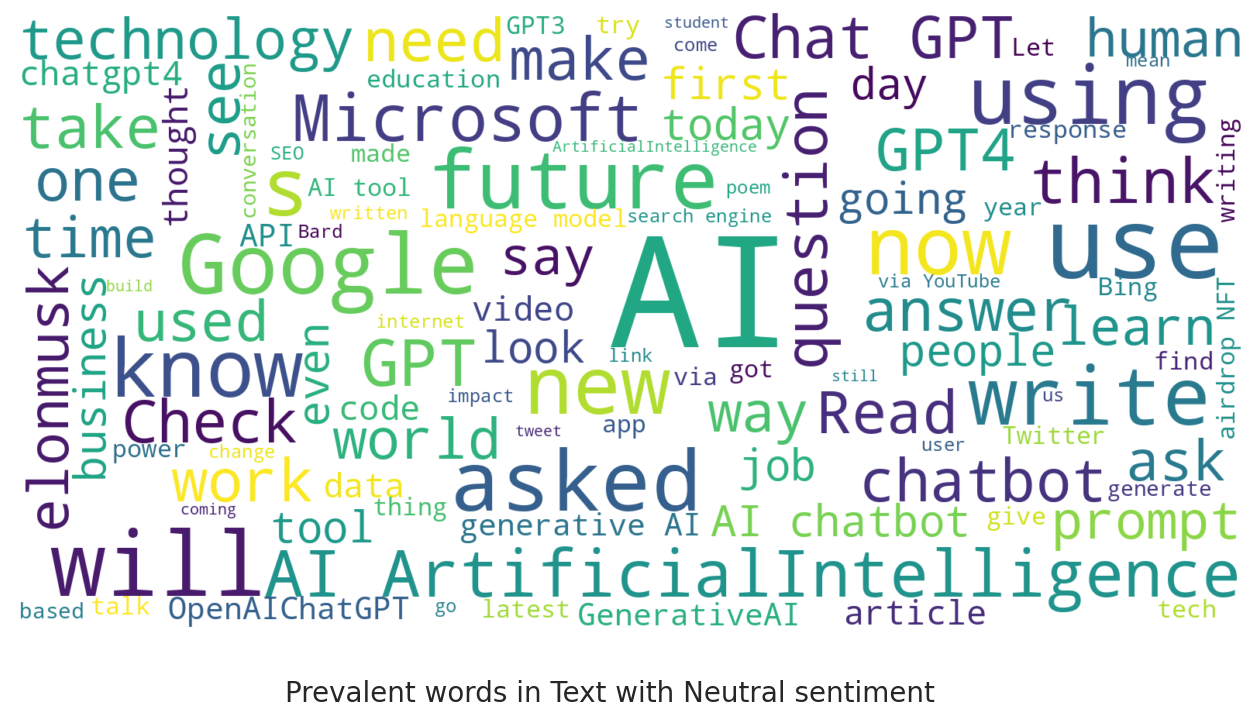

In [ ]:
show_wordcloud(df.loc[df['text_sentiment']=="Neutral", 'Tweet'], title = 'Prevalent words in Text with Neutral sentiment', mask=None)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Assuming 'df' is the DataFrame containing the tweet data
# Handle missing values in the 'Tweet' column by filling NaN with an empty string
df['Tweet'] = df['Tweet'].fillna('')

X = df['Tweet']
y = df['text_sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use TF-IDF vectorization for text data
vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust the max_features parameter as needed
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train a Logistic Regression classifier
classifier = LogisticRegression()
classifier.fit(X_train_vectorized, y_train)

# Predict sentiments for test data
predictions = classifier.predict(X_test_vectorized)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Sentiment Classification Accuracy using Logistic Regression: {:.2f}%".format(accuracy * 100))


Sentiment Classification Accuracy using Logistic Regression: 87.42%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Figure size 1200x600 with 0 Axes>

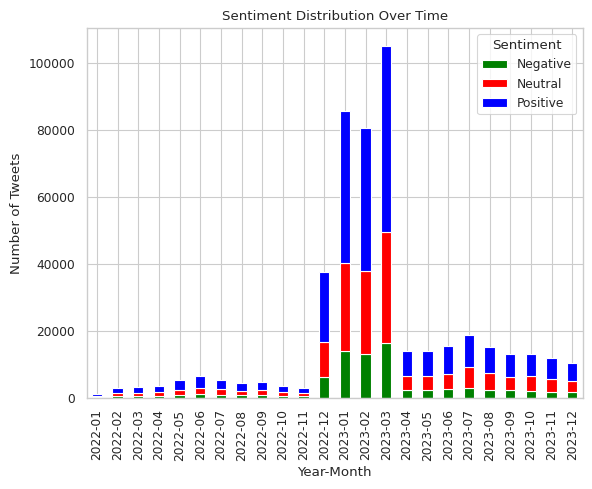

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' contains columns 'Date' (datetime format) and 'text_sentiment'
# Extract year-month from the 'Date' column and create a new column 'YearMonth'
df['YearMonth'] = df['Date'].dt.to_period('M')

# Group data by 'YearMonth' and 'text_sentiment', and count the number of tweets
sentiment_counts = df.groupby(['YearMonth', 'text_sentiment']).size().reset_index(name='count')

# Pivot the DataFrame to have 'YearMonth' as index, 'text_sentiment' as columns, and 'count' as values
sentiment_counts_pivot = sentiment_counts.pivot(index='YearMonth', columns='text_sentiment', values='count').fillna(0)

# Plot histograms for each sentiment category over time
plt.figure(figsize=(12, 6))

colors = ["green", "red", "blue"]
sentiment_counts_pivot.plot(kind='bar', stacked=True, color=colors)
plt.xlabel('Year-Month')
plt.ylabel('Number of Tweets')
plt.title('Sentiment Distribution Over Time')
plt.legend(title='Sentiment', loc='upper right')
plt.grid(True)
plt.show()


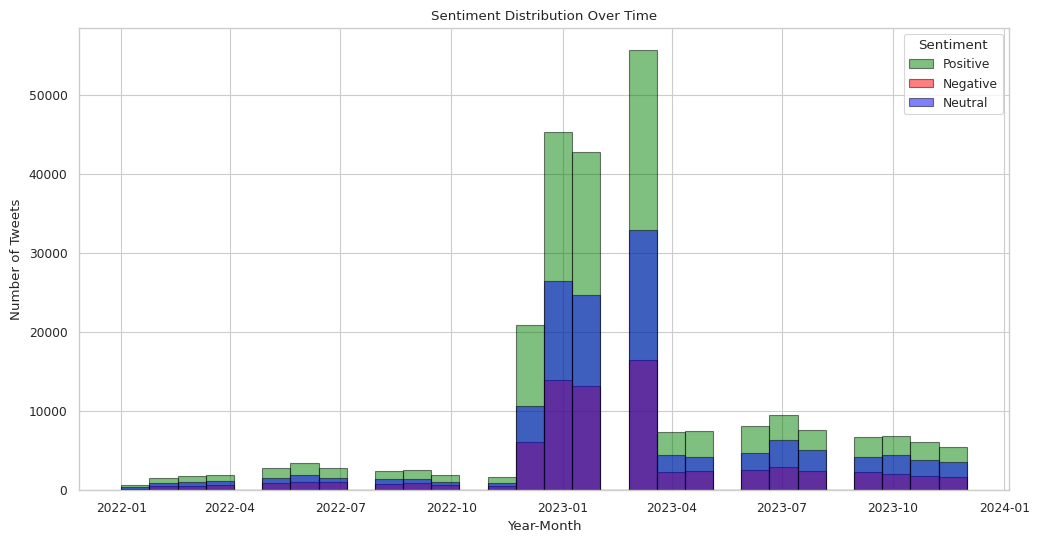

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' contains columns 'Date' (datetime format) and 'text_sentiment'
# Extract year-month from the 'Date' column and create a new column 'YearMonth'
df['YearMonth'] = df['Date'].dt.to_period('M')

# Convert period objects to strings for plotting
df['YearMonth'] = df['YearMonth'].dt.to_timestamp()

# Separate data by sentiment categories
positive_tweets = df[df['text_sentiment'] == 'Positive']
negative_tweets = df[df['text_sentiment'] == 'Negative']
neutral_tweets = df[df['text_sentiment'] == 'Neutral']

# Plot overlapping histograms for each sentiment category over time
plt.figure(figsize=(12, 6))

plt.hist(positive_tweets['YearMonth'], bins=30, alpha=0.5, label='Positive', color='green', edgecolor='black')
plt.hist(negative_tweets['YearMonth'], bins=30, alpha=0.5, label='Negative', color='red', edgecolor='black')
plt.hist(neutral_tweets['YearMonth'], bins=30, alpha=0.5, label='Neutral', color='blue', edgecolor='black')

plt.xlabel('Year-Month')
plt.ylabel('Number of Tweets')
plt.title('Sentiment Distribution Over Time')
plt.legend(title='Sentiment')
plt.grid(True)
plt.show()


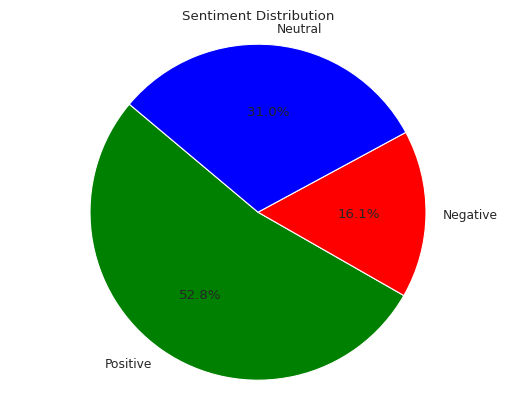

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df' contains column 'text_sentiment' with values 'Positive', 'Negative', 'Neutral'
positive_count = len(df[df['text_sentiment'] == 'Positive'])
negative_count = len(df[df['text_sentiment'] == 'Negative'])
neutral_count = len(df[df['text_sentiment'] == 'Neutral'])

labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive_count, negative_count, neutral_count]
colors = ['green', 'red', 'blue']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Sentiment Distribution')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Assuming sentiments_df contains sentiment analysis results with columns 'Date', 'Positive', 'Negative', 'Neutral'
# Calculate counts of positive, negative, and neutral sentiments
positive_count = sentiments_df['Positive'].sum()
negative_count = sentiments_df['Negative'].sum()
neutral_count = sentiments_df['Neutral'].sum()

# Create a stacked bar chart
sentiments_df.set_index('Date')[['Positive', 'Negative', 'Neutral']].plot(kind='bar', stacked=True)
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.title('Sentiment Distribution Over Time')

# Add legend and show the plot
plt.legend(['Positive', 'Negative', 'Neutral'])
plt.show()
